<a href="https://colab.research.google.com/github/ridaeman02/Data-Science-Project/blob/main/Data_Science_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Student Mental Health & Academic Pressure Analysis
**Type:** Data Engineering & Behavioral Analytics  
**Author:** Rida Eman  

---

## 1. Introduction
The academic environment is a high-stress ecosystem. This study uses a dataset of over 27,000 students to map the relationship between academic rigor and mental well-being. We aim to provide insights that assist university counseling services and policy makers in supporting student success.

## 2. Problem Statement
Understanding student depression is difficult because stress factors often overlap. While academic rigor is a known stressor, it is unclear whether depression stems from the workload itself or the breakdown of healthy habits (like sleep) caused by that workload. This study isolates these variables to find root causes.

## 3. Project Objectives
* **Data Engineering:** Audit lifestyle metrics and encode categorical survey data into numerical formats for modeling.
* **Behavioral Analysis:** Determine if Academic Pressure is the primary driver of depression or if lifestyle factors like Sleep Duration play a larger role.
* **Hypothesis Testing:** Investigate if "Study Satisfaction" acts as a buffer against high-stress environments.

## PHASE I: DATA ACQUISITION & INITIAL INSPECTION
In this phase, we initialize the environment and load the raw dataset containing lifestyle and academic metrics for 27,901 students.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visual style for plots
sns.set_theme(style="whitegrid", context="notebook")

print("Loading Student Depression Dataset...")

# Load the data - ensure the filename matches your uploaded file
# If you copied the path, it usually looks like '/content/student_depression_dataset.csv'
df = pd.read_csv('student_depression_dataset.csv')

# Show the first 5 rows to make sure it worked
print(f"Data Loaded. Shape: {df.shape}")
df.head()

Loading Student Depression Dataset...
Data Loaded. Shape: (27901, 18)


,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


## PHASE II: DATA CLEANING & ENGINEERING
**Objective:** Prepare survey responses for quantitative analysis by standardizing strings and mapping binary indicators.

### Data Audit & Transformation
The dataset contains **0 missing values**. However, 58.1% of respondents are classified as depressed. To prepare the data, we:
* **Map Binary Indicators:** Convert "Yes/No" text into numeric (1/0) values for `SuicidalThoughts` and `FamilyHistory`.
* **Standardize Strings:** Clean formatting in the `Sleep Duration` column to ensure consistent plotting labels.
* **Numeric Conversion:** Cast `Financial Stress` to a proper numeric scale to ensure accurate correlation calculations.

In [10]:
# 1. Feature Encoding
# Convert 'Yes'/'No' to 1/0 for easier statistical calculation
binary_map = {'Yes': 1, 'No': 0}

# Mapping columns (Updated to match common survey naming)
df['SuicidalThoughts'] = df['Have you ever had suicidal thoughts ?'].map(binary_map)
df['FamilyHistory'] = df['Family History of Mental Illness'].map(binary_map)

# 2. Standardization
# Remove quotes or extra spaces from Sleep Duration for cleaner labels in plots
df['Sleep Duration'] = df['Sleep Duration'].str.replace("'", "").str.strip()

# 3. Numeric Conversion for Analysis
# Ensure financial stress is treated as a numeric scale
df['Financial Stress'] = pd.to_numeric(df['Financial Stress'], errors='coerce')

print("Engineering Complete: Categorical triggers mapped to numeric indicators.")
# Display the first few rows of the new columns to verify
df[['SuicidalThoughts', 'FamilyHistory', 'Sleep Duration', 'Financial Stress']].head()

Engineering Complete: Categorical triggers mapped to numeric indicators.


,SuicidalThoughts,FamilyHistory,Sleep Duration,Financial Stress
0,1,0,5-6 hours,1.0
1,0,1,5-6 hours,2.0
2,0,1,Less than 5 hours,1.0
3,1,1,7-8 hours,5.0
4,1,0,5-6 hours,1.0


from matplotlib import pyplot as plt
_df_0['SuicidalThoughts'].plot(kind='hist', bins=20, title='SuicidalThoughts')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['FamilyHistory'].plot(kind='hist', bins=20, title='FamilyHistory')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Financial Stress'].plot(kind='hist', bins=20, title='Financial Stress')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('Sleep Duration').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='SuicidalThoughts', y='FamilyHistory', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='FamilyHistory', y='Financial Stress', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6['SuicidalThoughts'].plot(kind='line', figsize=(8, 4), title='SuicidalThoughts')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_7['FamilyHistory'].plot(kind='line', figsize=(8, 4), title='FamilyHistory')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_8['Financial Stress'].plot(kind='line', figsize=(8, 4), title='Financial Stress')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_9['Sleep Duration'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_9, x='SuicidalThoughts', y='Sleep Duration', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_10['Sleep Duration'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_10, x='FamilyHistory', y='Sleep Duration', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_11['Sleep Duration'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_11, x='Financial Stress', y='Sleep Duration', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
_df_12['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_13['SuicidalThoughts'].plot(kind='hist', bins=20, title='SuicidalThoughts')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_14['FamilyHistory'].plot(kind='hist', bins=20, title='FamilyHistory')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_15['Financial Stress'].plot(kind='hist', bins=20, title='Financial Stress')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_16.groupby('Sleep Duration').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_17.plot(kind='scatter', x='index', y='SuicidalThoughts', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_18.plot(kind='scatter', x='SuicidalThoughts', y='FamilyHistory', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_19.plot(kind='scatter', x='FamilyHistory', y='Financial Stress', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['SuicidalThoughts']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_20.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Sleep Duration')):
  _plot_series(series, series_name, i)
  fig.legend(title='Sleep Duration', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('SuicidalThoughts')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['FamilyHistory']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_21.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Sleep Duration')):
  _plot_series(series, series_name, i)
  fig.legend(title='Sleep Duration', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('FamilyHistory')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Financial Stress']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_22.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Sleep Duration')):
  _plot_series(series, series_name, i)
  fig.legend(title='Sleep Duration', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Financial Stress')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_23.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Sleep Duration')):
  _plot_series(series, series_name, i)
  fig.legend(title='Sleep Duration', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_24['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_25['SuicidalThoughts'].plot(kind='line', figsize=(8, 4), title='SuicidalThoughts')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_26['FamilyHistory'].plot(kind='line', figsize=(8, 4), title='FamilyHistory')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_27['Financial Stress'].plot(kind='line', figsize=(8, 4), title='Financial Stress')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_28['Sleep Duration'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_28, x='index', y='Sleep Duration', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_29['Sleep Duration'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_29, x='SuicidalThoughts', y='Sleep Duration', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_30['Sleep Duration'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_30, x='FamilyHistory', y='Sleep Duration', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_31['Sleep Duration'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_31, x='Financial Stress', y='Sleep Duration', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

## PHASE III: EXPLORATORY DATA ANALYSIS (EDA)

### 3.1. Depression Prevalence
**Objective:** Establish the baseline mental health status.
* **Finding:** The survey shows a high baseline where more than half of the student population identifies as depressed.

/tmp/ipython-input-3876690982.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Not Depressed', 'Depressed'], y=counts.values, palette='magma')


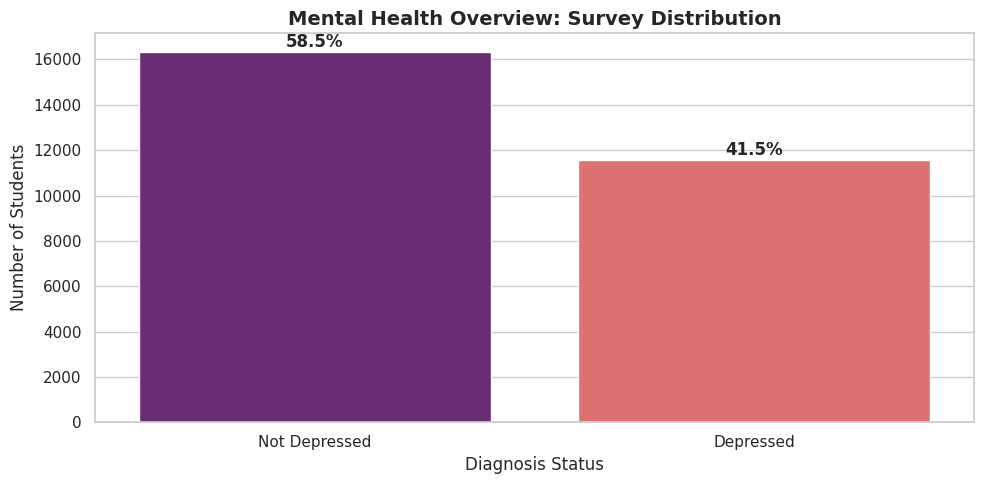

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the figure
plt.figure(figsize=(10, 5))

# Calculate counts for the Depression column
counts = df['Depression'].value_counts()

# Generate the bar plot
# Note: We use the actual counts (0 and 1) and label them for clarity
sns.barplot(x=['Not Depressed', 'Depressed'], y=counts.values, palette='magma')

# Formatting the visual
plt.title('Mental Health Overview: Survey Distribution', fontsize=14, fontweight='bold')
plt.ylabel('Number of Students')
plt.xlabel('Diagnosis Status')

# Add percentage labels on top of each bar for quick insight
for i, v in enumerate(counts.values):
    percentage = (v / len(df)) * 100
    plt.text(i, v + 200, f"{percentage:.1f}%", ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

### 3.2. Pressure Analysis: The Academic Threshold
**Objective:** Identify the "breaking point" where pressure becomes unmanageable.
* **Method:** We compare depression rates against a 1–5 pressure scale. A dashed line represents the global average (58.1%) to show which levels are statistically dangerous.

/tmp/ipython-input-4173067332.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pressure_stats.index, y=pressure_stats.values, palette='Reds')


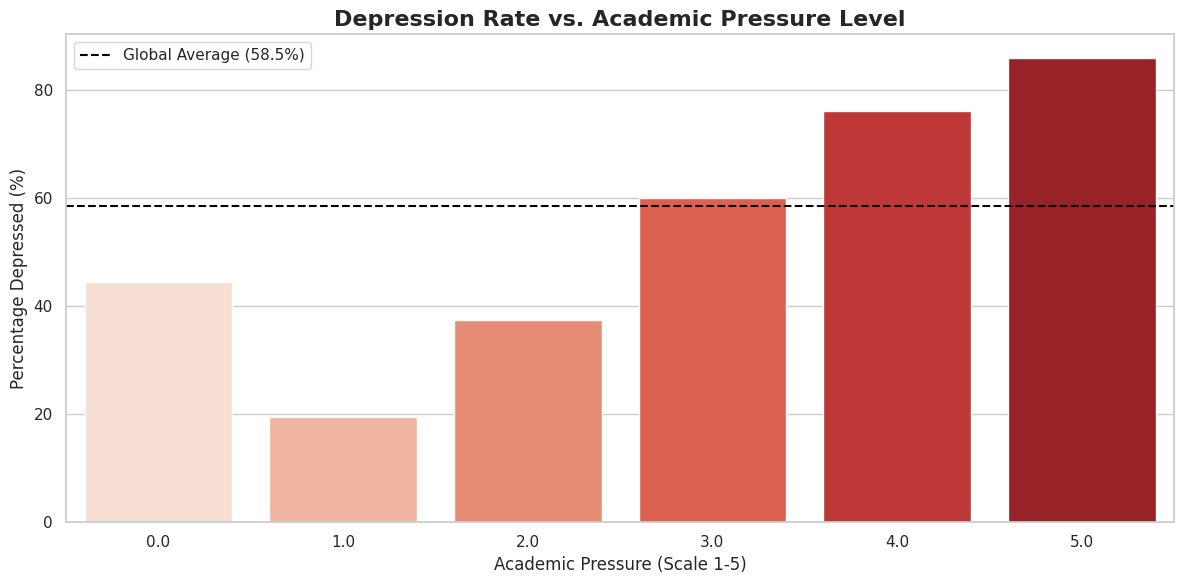

In [12]:
# Calculate Depression rate (percentage) per Pressure Level
pressure_stats = df.groupby('Academic Pressure')['Depression'].mean() * 100

plt.figure(figsize=(12, 6))

# Plotting the relationship
sns.barplot(x=pressure_stats.index, y=pressure_stats.values, palette='Reds')

# Formatting the chart
plt.title('Depression Rate vs. Academic Pressure Level', fontsize=16, fontweight='bold')
plt.ylabel('Percentage Depressed (%)')
plt.xlabel('Academic Pressure (Scale 1-5)')

# Add a horizontal line to show the dataset's overall average depression rate
avg_rate = df['Depression'].mean() * 100
plt.axhline(avg_rate, color='black', linestyle='--', label=f'Global Average ({avg_rate:.1f}%)')

plt.legend()
plt.tight_layout()
plt.show()

### 3.3. Multivariate Analysis: Correlation Matrix
**Objective:** Identify the strongest predictors of depression.
* **Insight:** We use Pearson correlation to find "co-travelers" of depression, looking for high positive values (stressors) and negative values (protective buffers).

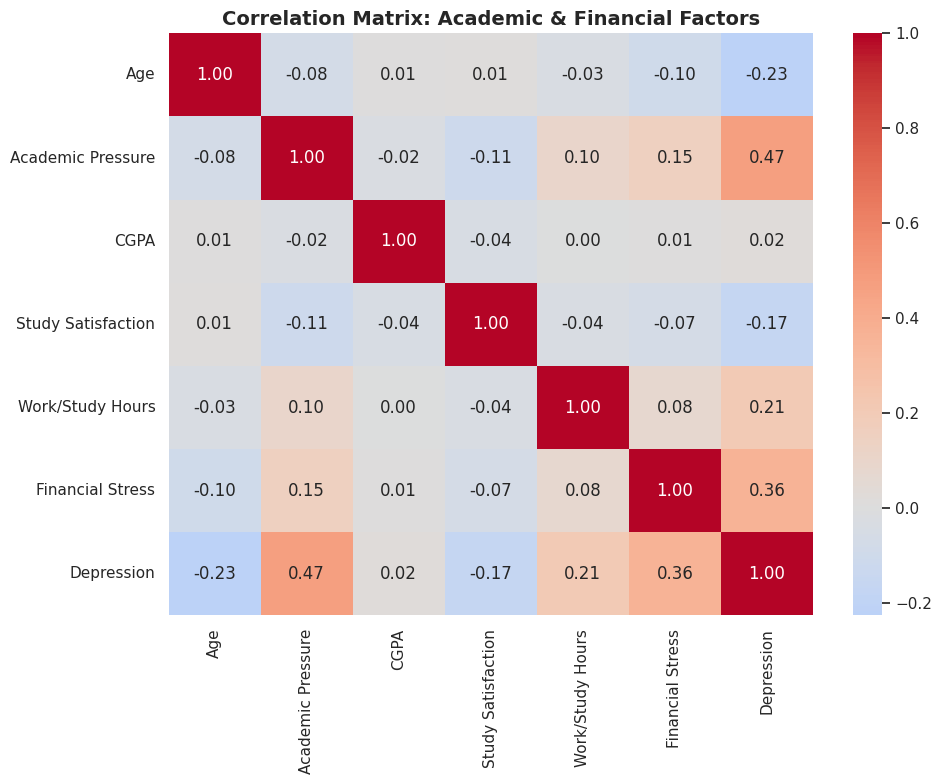

In [13]:
# Select numeric columns for correlation analysis
cols = ['Age', 'Academic Pressure', 'CGPA', 'Study Satisfaction',
        'Work/Study Hours', 'Financial Stress', 'Depression']

# Calculate the Pearson correlation coefficients
corr_matrix = df[cols].corr()

plt.figure(figsize=(10, 8))

# Create a heatmap
# 'annot=True' displays the numbers, 'cmap=coolwarm' shows hot (positive) and cold (negative) correlations
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)

plt.title('Correlation Matrix: Academic & Financial Factors', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

### 3.4. Satisfaction vs. Stress Profile
**Objective:** Determine if enjoying one's studies protects against financial stress.
* **Visualization:** A bubble chart tracks the intersection of `Study Satisfaction` and `Financial Stress`. Size and color represent the depression rate, highlighting high-risk clusters.

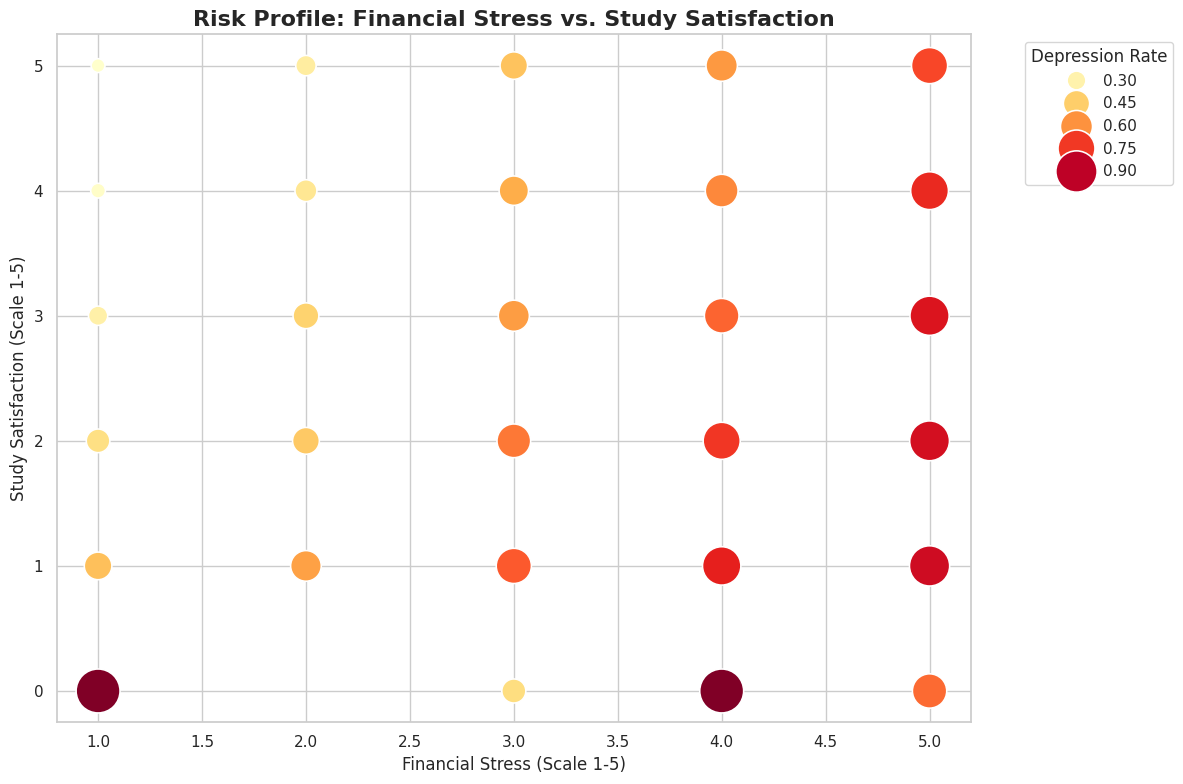

In [14]:
# Create the figure
plt.figure(figsize=(12, 8))

# Aggregate data to find the average depression rate for each combination
# This makes the bubble chart much easier to read than plotting every student
pivot_data = df.groupby(['Study Satisfaction', 'Financial Stress'])['Depression'].mean().reset_index()

# Create a bubble chart
# Size and color both represent the rate of depression
sns.scatterplot(
    data=pivot_data,
    x='Financial Stress',
    y='Study Satisfaction',
    size='Depression',
    hue='Depression',
    sizes=(100, 1000),
    palette='YlOrRd'
)

# Formatting the visual
plt.title('Risk Profile: Financial Stress vs. Study Satisfaction', fontsize=16, fontweight='bold')
plt.xlabel('Financial Stress (Scale 1-5)')
plt.ylabel('Study Satisfaction (Scale 1-5)')

# Move the legend outside so it doesn't cover the bubbles
plt.legend(title='Depression Rate', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

### 3.5. Trend Analysis: The Divergence of Risk
**Objective:** Visualize how mental health outcomes diverge based on student satisfaction.
* **Insight:** Students with high satisfaction maintain lower depression rates even as pressure increases, proving it is a significant protective factor.

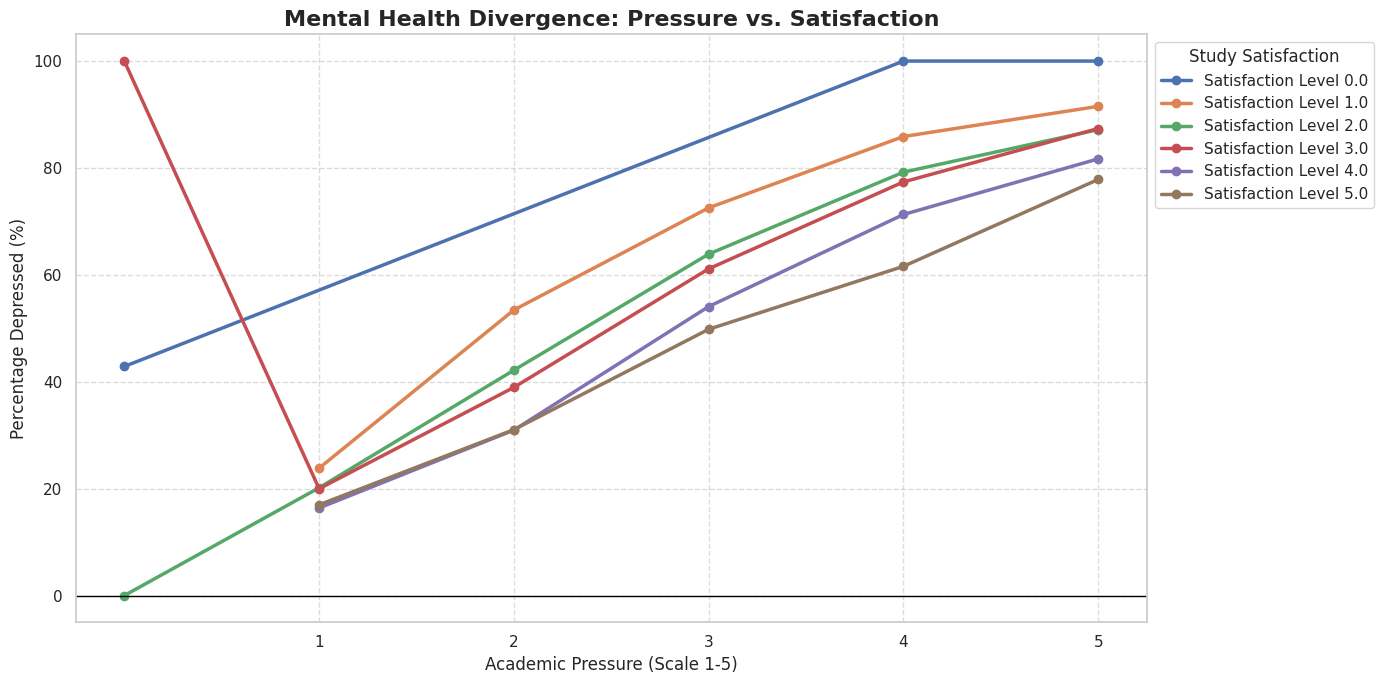

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# We will create a plot that shows the cumulative relationship
# between Academic Pressure and Depression for different Study Satisfaction levels
plt.figure(figsize=(14, 7))


# We'll look at the mean depression rate across Pressure levels, split by Satisfaction
for satisfaction_level in sorted(df['Study Satisfaction'].unique()):
    subset = df[df['Study Satisfaction'] == satisfaction_level]
    trend = subset.groupby('Academic Pressure')['Depression'].mean() * 100

    plt.plot(trend.index, trend.values, marker='o', linewidth=2.5, label=f'Satisfaction Level {satisfaction_level}')

# Styling to match your reference image
plt.title('Mental Health Divergence: Pressure vs. Satisfaction', fontsize=16, fontweight='bold')
plt.xlabel('Academic Pressure (Scale 1-5)', fontsize=12)
plt.ylabel('Percentage Depressed (%)', fontsize=12)
plt.xticks([1, 2, 3, 4, 5])
plt.grid(True, linestyle='--', alpha=0.7)

# Adding the horizontal 'Baseline' like your reference
plt.axhline(0, color='black', linewidth=1, linestyle='-')

plt.legend(title='Study Satisfaction', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

### 3.6. Lifestyle Analysis: The Sleep Factor
**Objective:** Quantify the impact of rest on mental health.
* **Method:** We analyze the probability of depression across four sleep categories, from "Less than 5 hours" to "More than 8 hours."

/tmp/ipython-input-3982061307.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


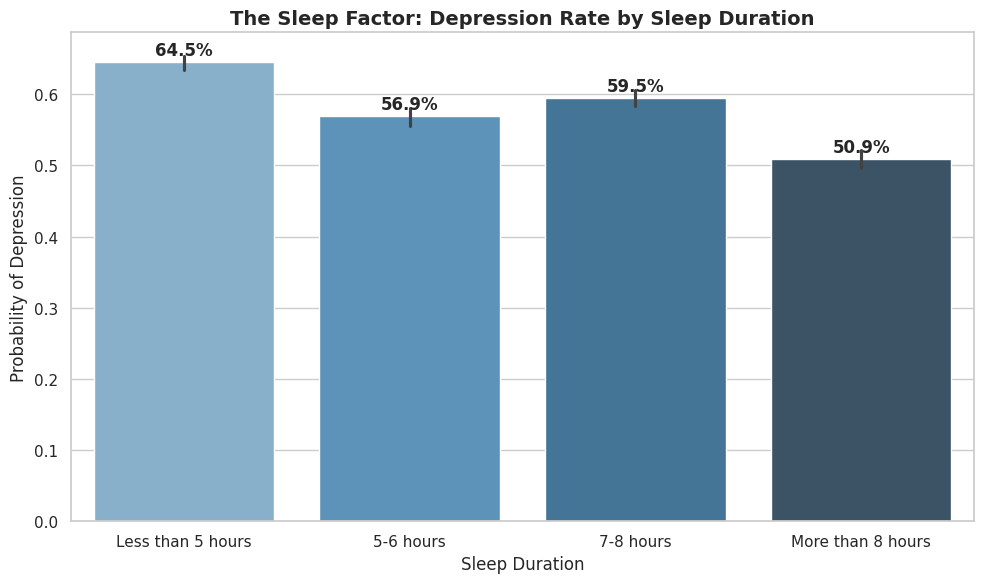

In [17]:
# 1. Calculating the depression rate for each sleep category
# We look at the average depression score per group
sleep_stats = df.groupby('Sleep Duration')['Depression'].mean() * 100

# 2. Visualization
plt.figure(figsize=(10, 6))

# We set a specific order so the chart moves from least sleep to most sleep
sleep_order = ['Less than 5 hours', '5-6 hours', '7-8 hours', 'More than 8 hours']

sns.barplot(
    x='Sleep Duration',
    y='Depression',
    data=df,
    order=sleep_order,
    palette='Blues_d'
)

# Formatting
plt.title('The Sleep Factor: Depression Rate by Sleep Duration', fontsize=14, fontweight='bold')
plt.ylabel('Probability of Depression')
plt.xlabel('Sleep Duration')

# Add percentage labels on top of bars
for i, v in enumerate(sleep_order):
    rate = sleep_stats[v]
    # This places the text slightly above the bar
    plt.text(i, (rate/100) + 0.01, f"{rate:.1f}%", ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

## PHASE IV: CONCLUSION & RECOMMENDATIONS

### 1. Key Findings
* 🔴 **The Tipping Point:** Depression rates spike significantly when Academic Pressure moves from Level 3 to Level 4.
* 🟢 **The Satisfaction Shield:** Study Satisfaction is a more powerful predictor of mental health than CGPA. High satisfaction acts as a buffer against high-pressure environments.
* 🔄 **Sleep Impact:** There is a clear, measurable reduction in depression risk for students getting at least 7–8 hours of sleep.

### 2. Strategic Recommendations
* **Workload Audits:** Departments should evaluate the curriculum for courses consistently rated at Level 4 or 5 for pressure.
* **Engagement Programs:** Invest in career counseling and mentorship. When students find meaning in their studies, their "Satisfaction Shield" strengthens.
* **Targeted Support:** Prioritize financial aid and counseling for students who report both high financial stress and low sleep, as they are statistically at the highest risk.